In [51]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.6.0'

In [3]:
keras.__version__

'2.6.0'

In [95]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [96]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## Classification MLP with two hidden layers

In [97]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

### above is equivalent to specify the model via a array
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28,28]),
keras.layers.Dense(300,activation="relu")
keras.layers.Dense(100,activation="relu"),
keras.layers.Dense(10,activation="softmax")
])

In [98]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_25 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.get_layer('dense_9').get_weights()

[array([[-0.067862  , -0.05659477,  0.00323225, ...,  0.04678162,
          0.05675808, -0.00247268],
        [-0.05683213,  0.02368422,  0.03002822, ..., -0.02742286,
         -0.00315484,  0.05786936],
        [ 0.07198191, -0.02257229, -0.04367535, ...,  0.00260413,
          0.01161171,  0.03588618],
        ...,
        [ 0.06251726, -0.0428813 ,  0.03766396, ...,  0.0283577 ,
          0.06132473,  0.00126199],
        [-0.06700384, -0.02336402,  0.01971057, ..., -0.06506869,
          0.02823671, -0.06325663],
        [ 0.03462599,  0.0472096 ,  0.04020333, ...,  0.03544644,
         -0.0284065 ,  0.04623077]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [99]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [53]:
history = model.fit(X_train,y_train, epochs =30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2231 - accuracy: 0.9199 - val_loss: 0.2960 - val_accuracy: 0.8936
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2205 - accuracy: 0.9214 - val_loss: 0.2973 - val_accuracy: 0.8930
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2174 - accuracy: 0.9221 - val_loss: 0.2910 - val_accuracy: 0.8936
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2134 - accuracy: 0.9239 - val_loss: 0.2966 - val_accuracy: 0.8952
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2101 - accuracy: 0.9251 - val_loss: 0.2898 - val_accuracy: 0.8966
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2066 - accuracy: 0.9256 - val_loss: 0.2917 - val_accuracy: 0.8964
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2036 - accuracy: 0.9268 - val_loss: 0.2873 - val_accuracy:

In [54]:
df = pd.DataFrame(history.history)

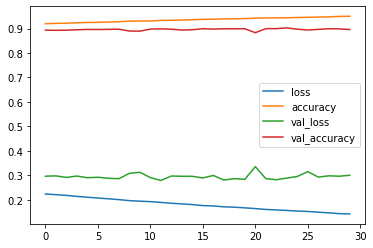

In [55]:
df.plot()
plt.show()

In [57]:
model.evaluate(X_test/255.0,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3414 - accuracy: 0.8857


[0.3413647413253784, 0.8857000470161438]

In [59]:
X_new = X_test[:3]
model.predict(X_new)

2022-01-25 22:19:37.786398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [62]:
model.predict_classes(X_new)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

## California housing regression MLP

In [83]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [67]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error",optimizer="sgd")
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20


2022-01-25 22:39:24.053176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 2s 3ms/step - loss: 1.0204 - val_loss: 0.9497
Epoch 2/20
  1/363 [..............................] - ETA: 1s - loss: 0.5330

2022-01-25 22:39:25.473480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 1s 3ms/step - loss: 0.8601 - val_loss: 0.4929
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4691 - val_loss: 0.4494
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4366 - val_loss: 0.4280
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4180 - val_loss: 0.4089
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4035 - val_loss: 0.3962
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3989 - val_loss: 0.3867
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3938 - val_loss: 0.3907
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3893 - val_loss: 0.3775
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3858 - val_loss: 0.3739
Epoch 11/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3828 - val_loss: 0.3730
Epoch 12/

In [68]:
mse_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3577


In [69]:
X_new = X_test[:3]
y_predict = model.predict(X_new)

2022-01-25 22:40:28.726526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [70]:
y_predict

array([[2.7958665],
       [2.1217656],
       [2.4688296]], dtype=float32)

In [71]:
model.save("my_keras_model.h5")

In [72]:
model = keras.models.load_model("my_keras_model.h5")

In [76]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train,y_train,epochs=10,callbacks=[checkpoint_cb])

Epoch 1/10
 66/363 [====>.........................] - ETA: 0s - loss: 0.3773

2022-01-26 00:54:45.715445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 1s 2ms/step - loss: 0.3645
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3619
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3607
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3593
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3576
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3569
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3544
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3526
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3501
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3486


## More common functional API

In [85]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_],outputs=[output])

In [86]:
model.compile(loss="mean_squared_error",optimizer="sgd")

In [87]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid))

Epoch 1/10
 58/363 [===>..........................] - ETA: 0s - loss: 2.2789

2022-01-26 16:17:34.130205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 1s 3ms/step - loss: 1.1926 - val_loss: 0.7696
Epoch 2/10
  1/363 [..............................] - ETA: 1s - loss: 0.4788

2022-01-26 16:17:35.174146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


363/363 [==============================] - 1s 3ms/step - loss: 0.6629 - val_loss: 0.6825
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4630 - val_loss: 1.0733
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 1.2692 - val_loss: 0.6446
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5713 - val_loss: 0.5068
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4555 - val_loss: 0.3923
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3758 - val_loss: 0.3778
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3595 - val_loss: 0.3631
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3500 - val_loss: 0.3508
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3442 - val_loss: 0.3513


## Subclassing API to build dynamic models

In [88]:
class WideandDeepModel(keras.Model):
    def __init__(self, units=30, activation = 'relu', **kwargs):
        super().__init__(**kwargs) #handles standard args 
        self.hidden1 = keras.layers.Dense(units,activation=activation)
        self.hidden2 = keras.layers.Dense(units,activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self,inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A,hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [90]:
model = WideandDeepModel()

## Early stopping

## Tensorboard for visualization

In [91]:
import os
root_logdir = os.path.join(os.curdir,'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir,run_id)

run_logdir = get_run_logdir()

In [100]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train,y_train, epochs=30,validation_data=(X_valid,y_valid),callbacks=[tensorboard_cb])

2022-01-26 17:26:22.997214: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-01-26 17:26:22.997247: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-01-26 17:26:22.997597: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/30
  22/1719 [..............................] - ETA: 8s - loss: 2.0796 - accuracy: 0.2969 

2022-01-26 17:26:23.277840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-26 17:26:23.332939: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-01-26 17:26:23.332949: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-01-26 17:26:23.338356: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-01-26 17:26:23.341766: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-01-26 17:26:23.346020: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./my_logs/run_2022_01_26-17_23_46/train/plugins/profile/2022_01_26_17_26_23

2022-01-26 17:26:23.346692: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./my_logs/run_2022_01_26-17_23_46/train/plugins/profile/2022_01_26_17_26_2

1715/1719 [============================>.] - ETA: 0s - loss: 0.7238 - accuracy: 0.7613

2022-01-26 17:26:30.396121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 8s 4ms/step - loss: 0.7232 - accuracy: 0.7614 - val_loss: 0.5385 - val_accuracy: 0.8090
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4865 - accuracy: 0.8315 - val_loss: 0.4585 - val_accuracy: 0.8438
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4420 - accuracy: 0.8449 - val_loss: 0.4118 - val_accuracy: 0.8612
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4147 - accuracy: 0.8550 - val_loss: 0.3902 - val_accuracy: 0.8664
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3945 - accuracy: 0.8616 - val_loss: 0.3743 - val_accuracy: 0.8716
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3778 - accuracy: 0.8670 - val_loss: 0.3711 - val_accuracy: 0.8670
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3640 - accuracy: 0.8716 - val_loss: 0.3799 - val_accuracy: 0.8706
Epo

In [101]:
%load_ext tensorboard 
%tensorboard --logdir=./my_logs --port=6006